In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
#----------------------------------------#
from scipy.stats import zscore
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')
#----------------------------------------#
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#----------------------------------------#
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
tupla=['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month (Y)',]
dfCredito=pd.read_csv("BancoUno.csv", names=tupla)
dfCredito

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
5,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,50000,male,high school,1,32,2,3,2,2,2,...,41526,42209,44960,1500,1600,1700,1500,3600,0,default
2392,20000,female,high school,2,49,0,0,2,0,-1,...,10400,1150,0,3008,0,600,1150,0,0,not default
2393,130000,female,university,2,24,1,-2,-1,-1,-1,...,-3,998,937,0,3372,0,1001,939,1013,not default
2394,110000,female,high school,1,27,0,0,0,0,0,...,47316,47175,47141,2326,3000,1807,1698,1911,1808,not default


In [3]:
#profile=ProfileReport(dfCredito, title='EDA_Creditos')
#profile.to_notebook_iframe()

In [4]:
dfCredito['default payment next month (Y)'].dtype

dtype('O')

In [5]:
dfCredito.describe()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.00000,2395.000000,2395.000000,2395.000000,2395.000000
mean,165895.615866,1.580376,35.424635,0.003758,-0.137370,-0.151566,-0.248852,-0.258873,-0.281420,51219.144885,...,45530.633820,41561.627557,40009.523591,38813.497704,5551.259708,5221.94238,4857.470981,4893.472234,4987.059290,5152.078914
std,129486.412237,0.525569,9.451436,1.122967,1.207365,1.247551,1.176504,1.156417,1.181577,77882.887342,...,69641.276168,68126.067839,64335.374111,65477.068756,13704.340652,14619.68646,22160.690090,14254.694001,16899.445034,20080.576190
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,...,-9850.000000,-7905.000000,-28335.000000,-339603.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3122.000000,...,2309.000000,1864.500000,1529.000000,1018.000000,1000.000000,586.00000,249.500000,244.500000,251.000000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21148.000000,...,19476.000000,17919.000000,17596.000000,15829.000000,2120.000000,2000.00000,1443.000000,1500.000000,1500.000000,1329.000000
75%,230000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62995.500000,...,56238.500000,49309.000000,48538.500000,47398.000000,5003.500000,4923.50000,4000.000000,4000.000000,4000.000000,4000.000000
max,1000000.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,...,548020.000000,891586.000000,927171.000000,961664.000000,239104.000000,285138.00000,896040.000000,205000.000000,332000.000000,528666.000000


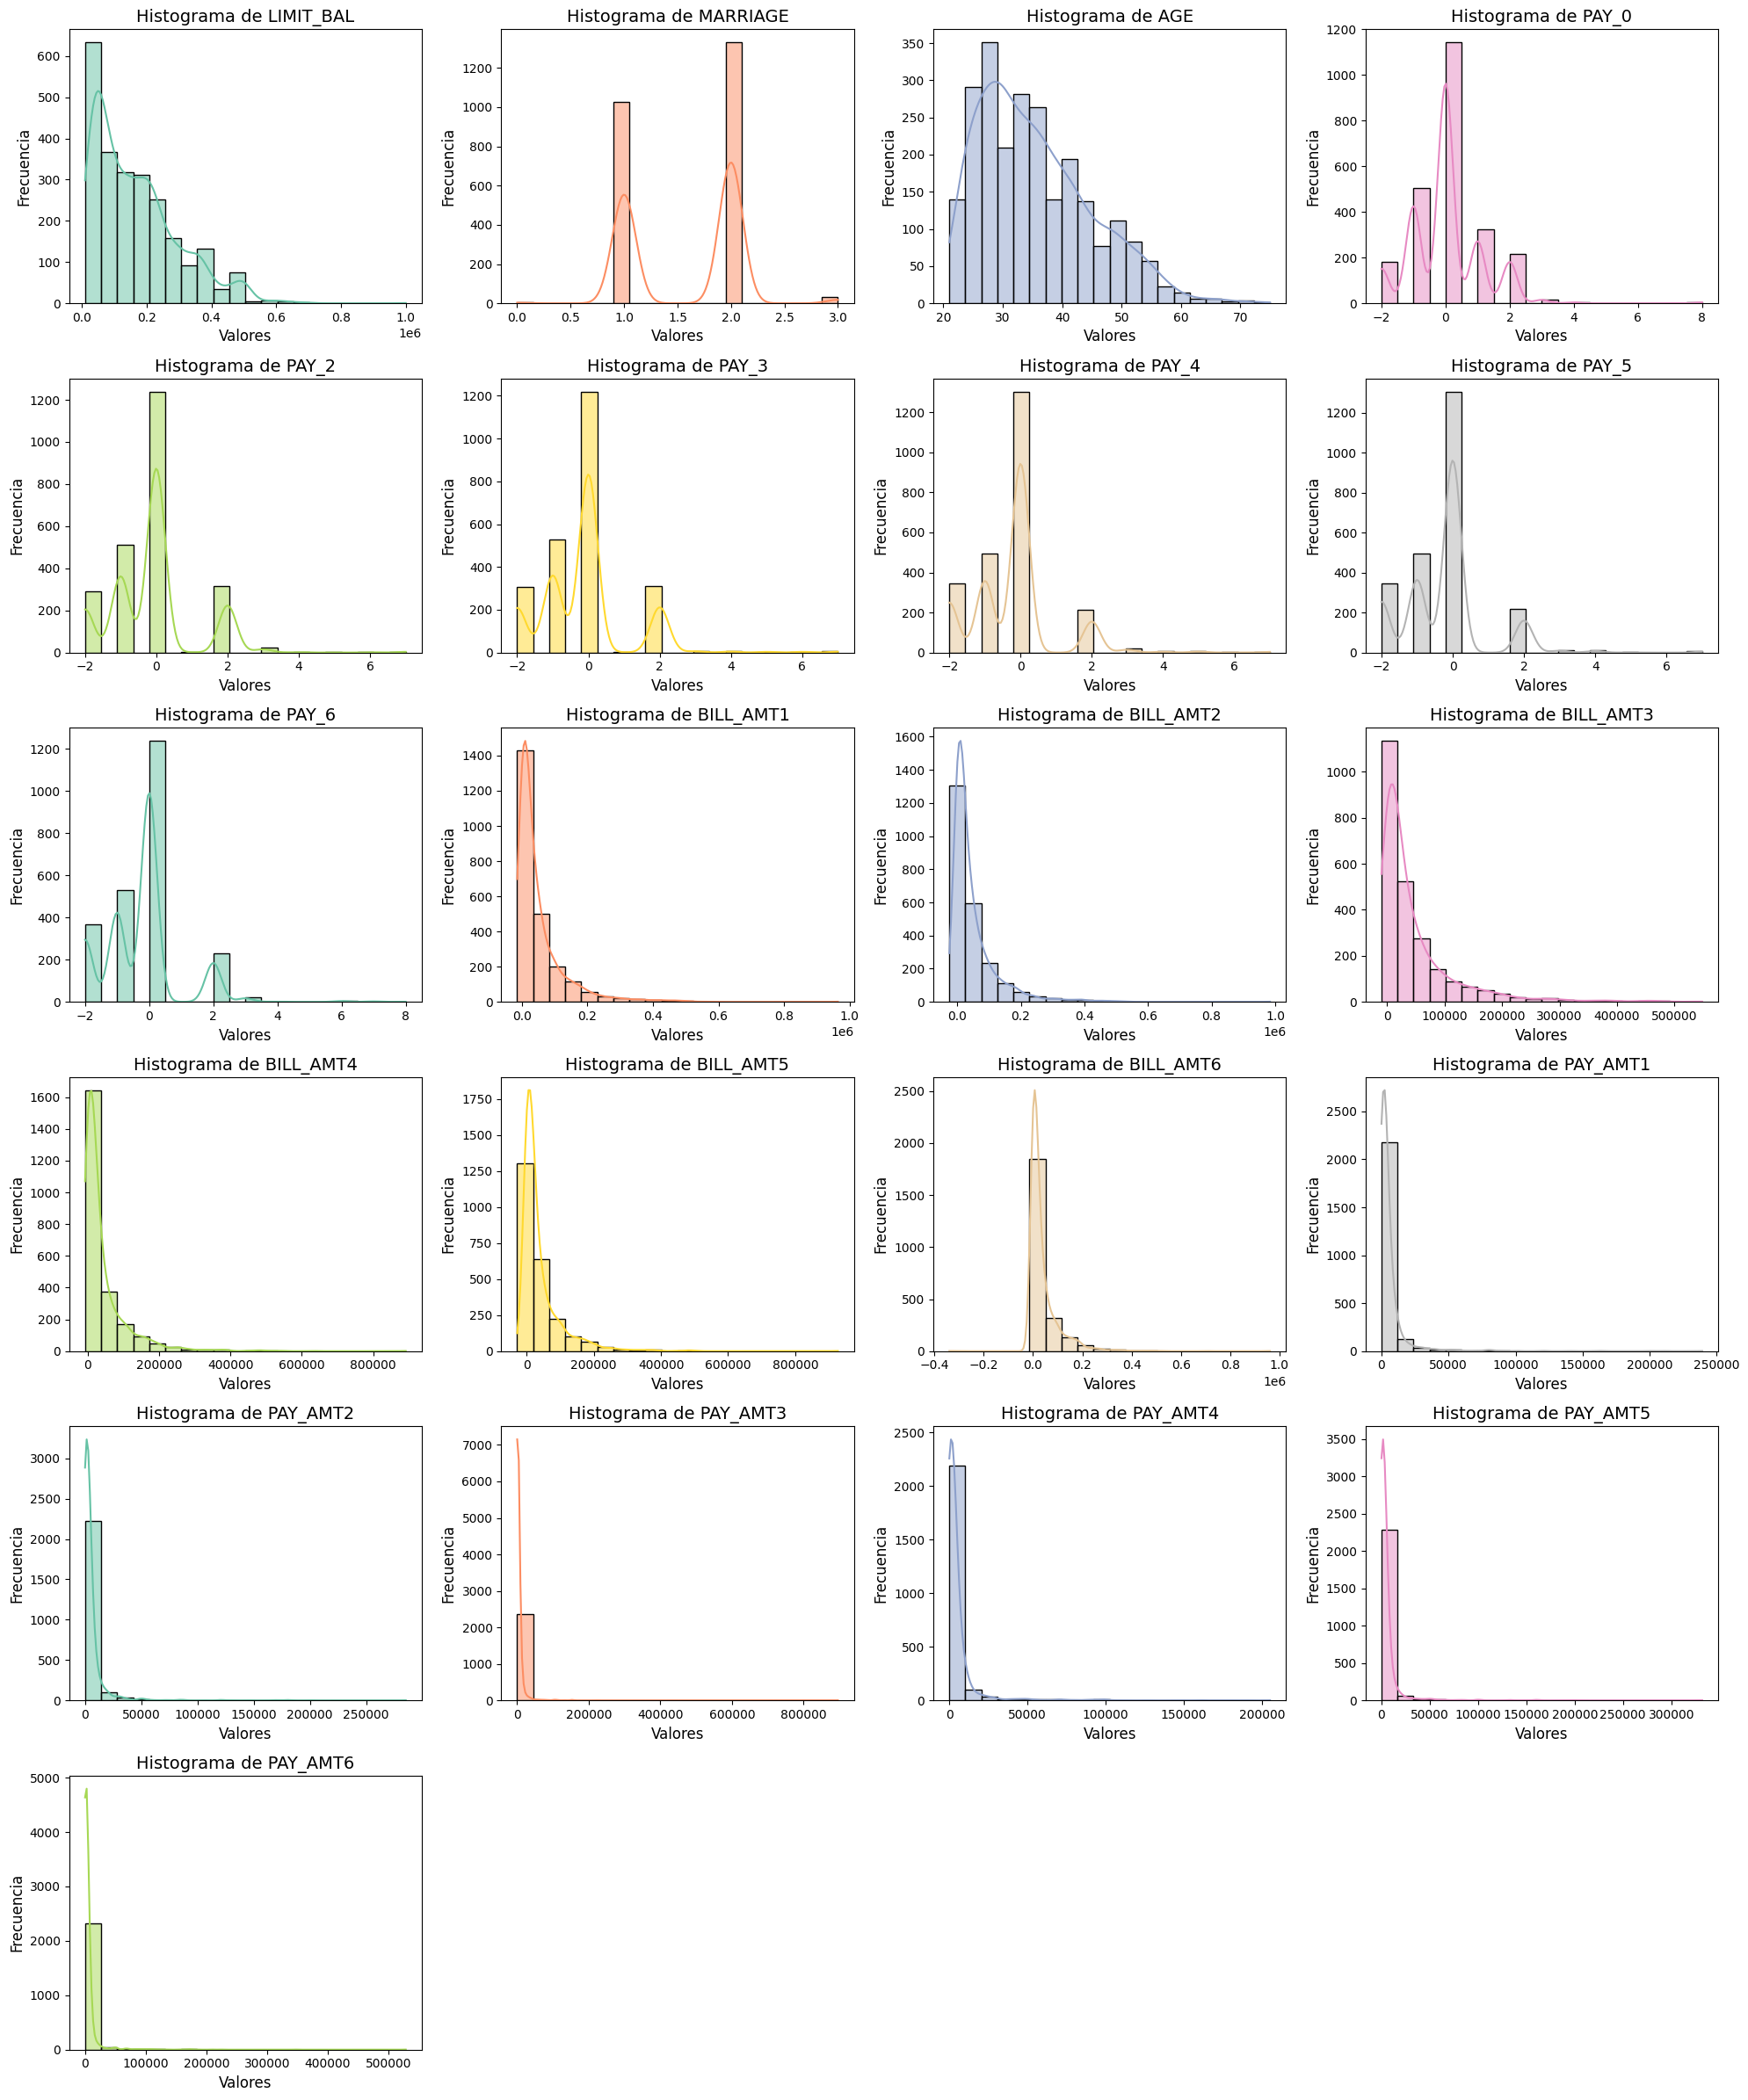

In [6]:
#Filtrar las columnas numericas  
df_numerico = dfCredito.select_dtypes(include='number')  

#Configurar tamaño de los graficos  
num_vars = len(df_numerico.columns)  
cols = 4  
rows = (num_vars // cols) + (num_vars % cols > 0)  

plt.figure(figsize=(20, rows * 4))  

#Usar una paleta de colores  
paleta = sns.color_palette("Set2", num_vars)  

#Crear un histograma por cada variable  
for i, columna in enumerate(df_numerico.columns, 1):  
    plt.subplot(rows, cols, i)  
    sns.histplot(df_numerico[columna].dropna(), kde=True, color=paleta[i-1], bins=20)  
    plt.title(f'Histograma de {columna}', fontsize=14)  
    plt.xlabel('Valores', fontsize=12)  
    plt.ylabel('Frecuencia', fontsize=12)  

#Ajusto espacio y nuestro grafico  
plt.tight_layout()  
plt.show()

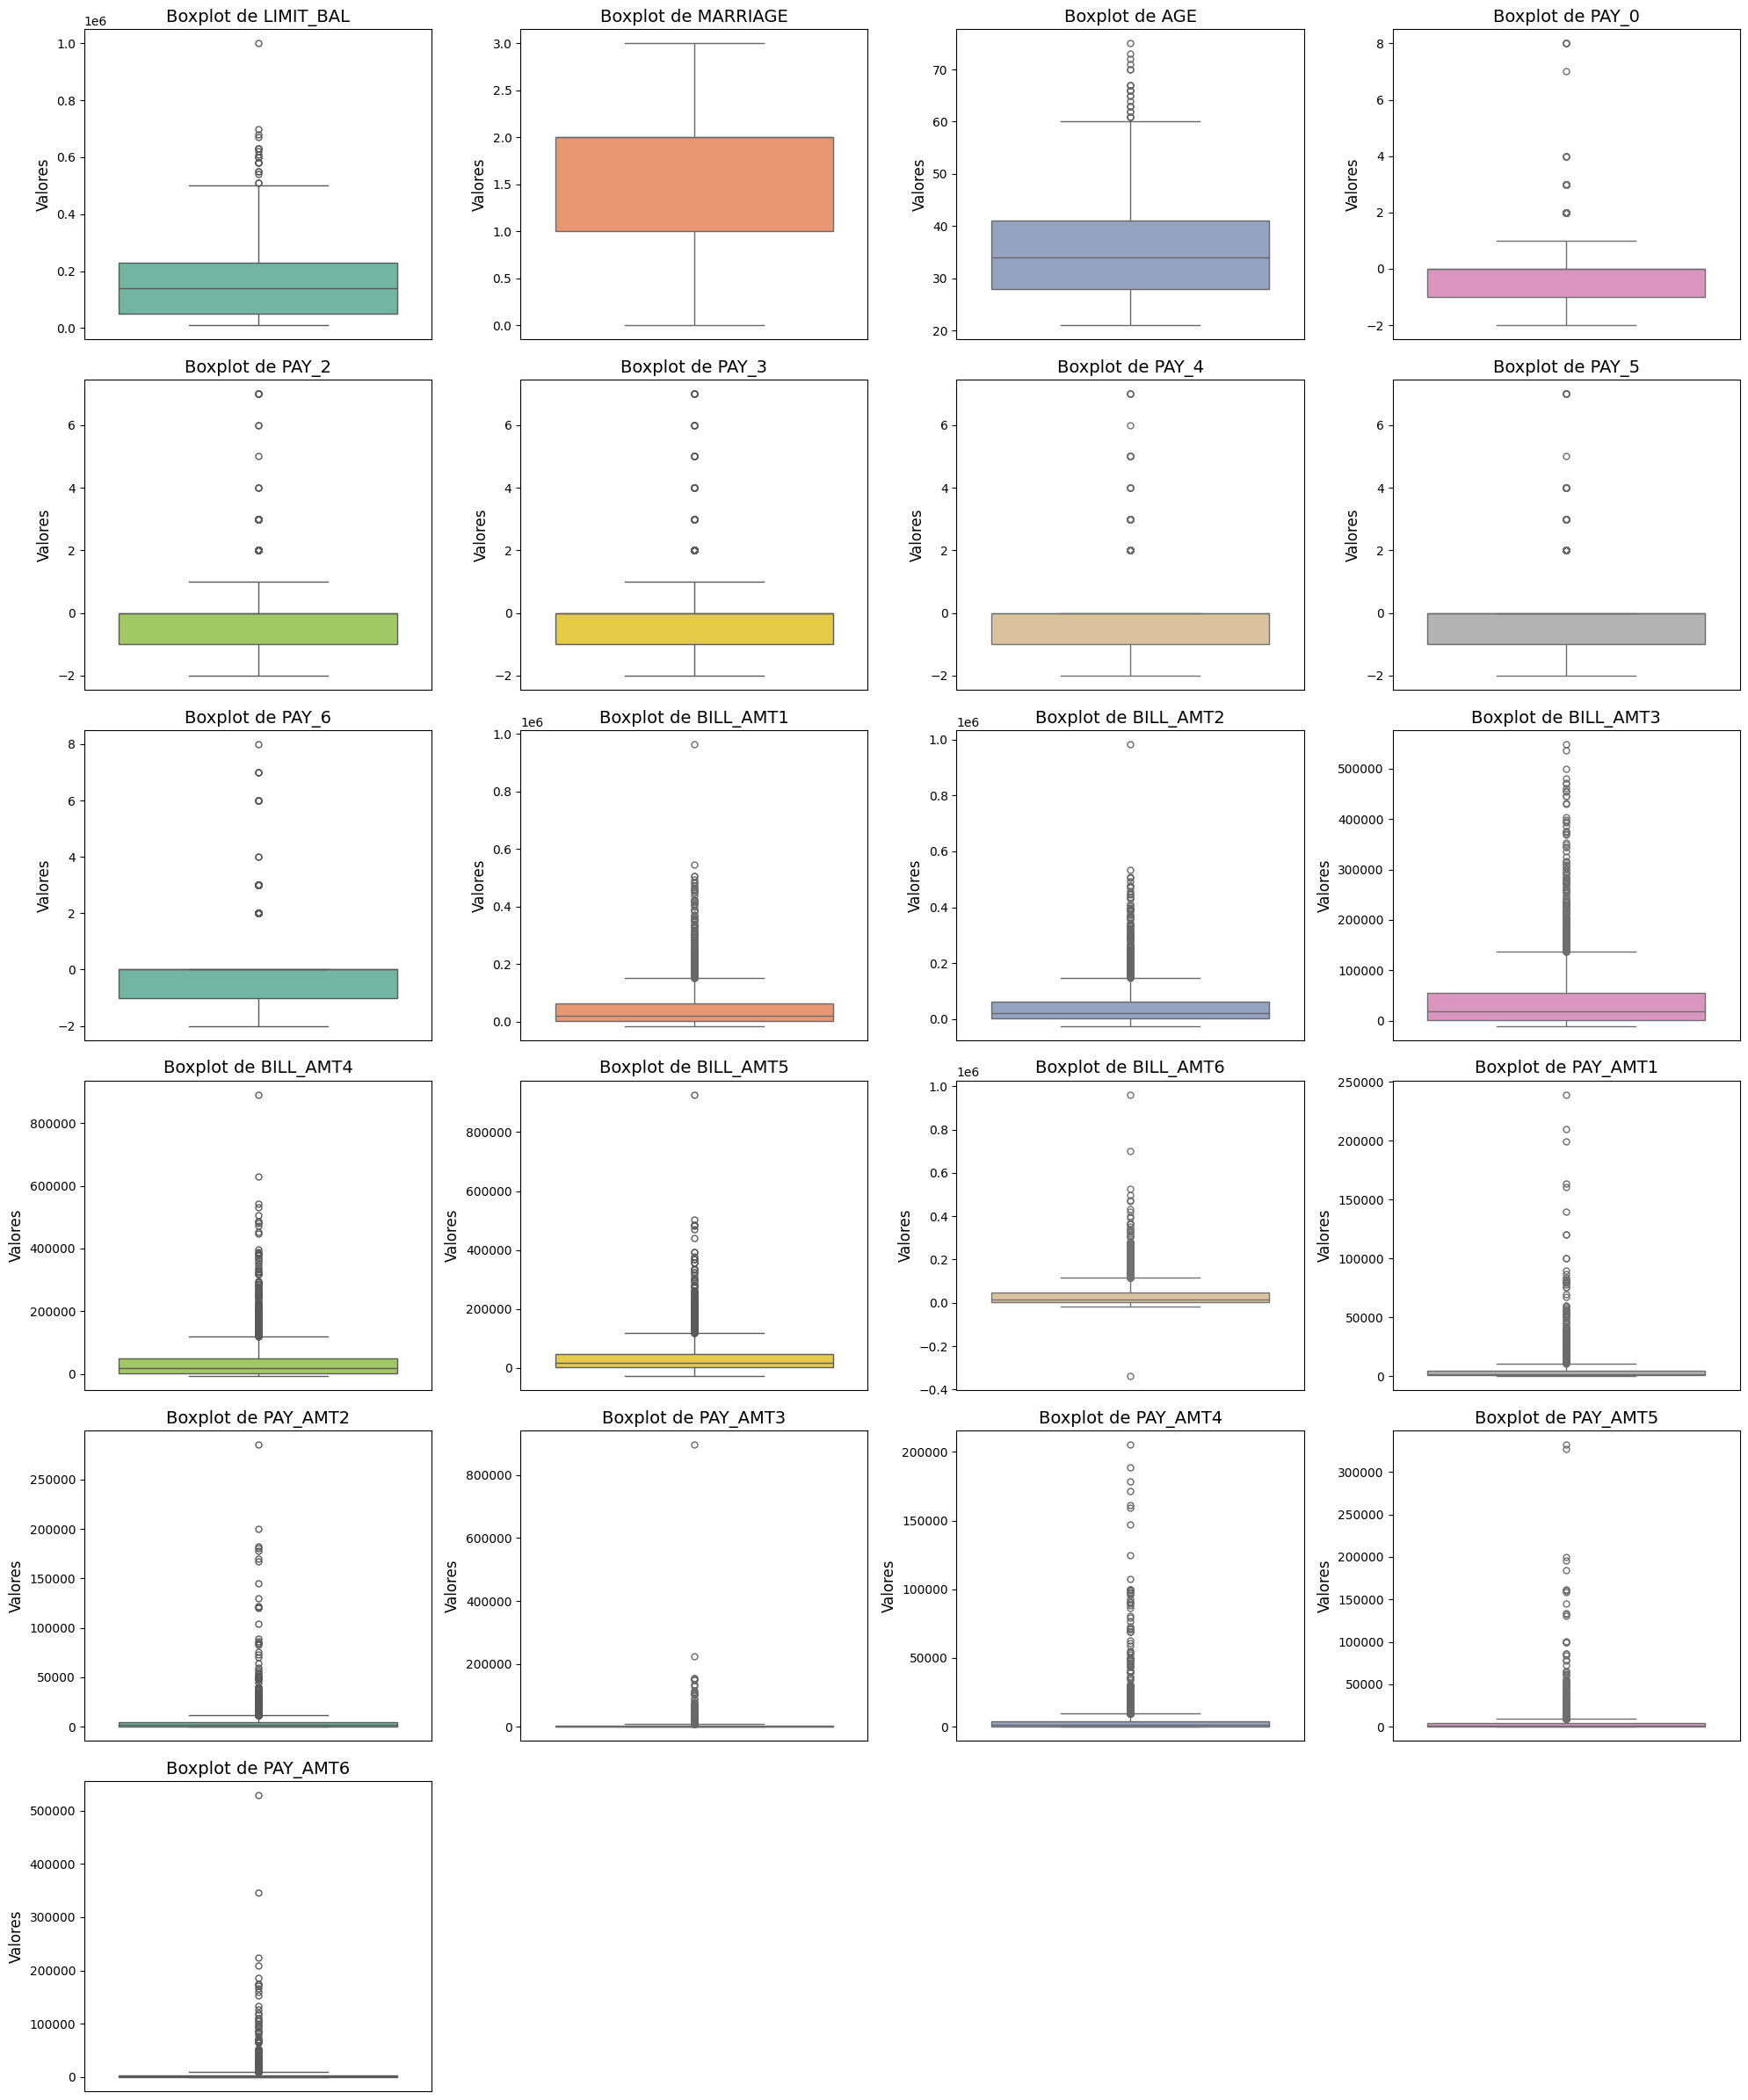

In [7]:
#Filtrar las columnas numericas
df_numerico = dfCredito.select_dtypes(include='number')
 
#Configurar tamano de los graficos
num_vars = len(df_numerico.columns)
cols = 4
rows = (num_vars // cols) + (num_vars % cols > 0)
 
plt.figure(figsize=(20, rows * 4))
 
#Usar una paleta de colores
paleta = sns.color_palette("Set2", num_vars)
 
#Crear un histograma por cada variable
for i, columna in enumerate(df_numerico.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df_numerico[columna], color=paleta[i-1], fliersize=5)
    plt.title(f'Boxplot de {columna}', fontsize=14)
    plt.ylabel('Valores', fontsize=12)
    plt.xticks([])
 
#Ajusto espacio y muestro grafico
plt.tight_layout()
plt.show()

<h1>IQR - Limit Bal<h1/>

In [8]:
#Calcular los Q25-Q75
seventy_fifth = dfCredito['LIMIT_BAL'].quantile(0.75)
twenty_fifth = dfCredito['LIMIT_BAL'].quantile(0.25)
#Calcular el IQR
iqr = seventy_fifth - twenty_fifth
#Calcular los limites (superior e inferior)
upper = seventy_fifth + (1.5*iqr)
lower = twenty_fifth - (1.5*iqr)
#Identificar los Outliers
outlier_LimitBal = dfCredito[(dfCredito['LIMIT_BAL'] < lower) | (dfCredito['LIMIT_BAL'] > upper)]
outlier_LimitBal.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
12,630000,female,university,2,41,-1,0,-1,-1,-1,...,6500,6500,2870,1000,6500,6500,6500,2870,0,not default
260,510000,female,graduate school,2,29,0,0,0,0,0,...,103776,87265,36739,40010,20094,5000,5001,25365,65000,not default
433,580000,female,graduate school,1,36,0,0,0,0,0,...,169365,168755,167964,6422,6565,5951,6006,5894,5946,not default
451,600000,male,graduate school,1,53,2,2,0,0,0,...,447130,440982,434715,0,18000,16000,16000,21000,20000,default
527,620000,female,university,1,45,2,2,0,0,0,...,163781,167159,170894,0,6200,6000,6000,6500,6000,default


In [9]:
inlier_LimitBal = dfCredito[(dfCredito['LIMIT_BAL'] >= lower) & (dfCredito['LIMIT_BAL'] <= upper)]
inlier_LimitBal.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
5,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default


In [10]:
def OutlierIQR(df, column):
    # Calcular Q25 y Q75
    seventy_fifth = df[column].quantile(0.75)
    twenty_fifth = df[column].quantile(0.25)
    # Calcular el IQR
    iqr = seventy_fifth - twenty_fifth
    # Calcular los límites (superior e inferior)
    upper = seventy_fifth + (1.5 * iqr)
    lower = twenty_fifth - (1.5 * iqr)
    # Filtrar los outliers
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)] 
    return filtered_df
 
dfCredito = OutlierIQR(dfCredito, 'BILL_AMT1')
dfCredito = OutlierIQR(dfCredito, 'BILL_AMT2')
dfCredito = OutlierIQR(dfCredito, 'BILL_AMT3')
dfCredito = OutlierIQR(dfCredito, 'BILL_AMT4')
dfCredito = OutlierIQR(dfCredito, 'BILL_AMT5')
dfCredito = OutlierIQR(dfCredito, 'BILL_AMT6')
dfCredito = OutlierIQR(dfCredito, 'PAY_AMT1')
dfCredito = OutlierIQR(dfCredito, 'PAY_AMT2')
dfCredito = OutlierIQR(dfCredito, 'PAY_AMT3')
dfCredito = OutlierIQR(dfCredito, 'PAY_AMT4')
dfCredito = OutlierIQR(dfCredito, 'PAY_AMT5')
dfCredito = OutlierIQR(dfCredito, 'PAY_AMT6')

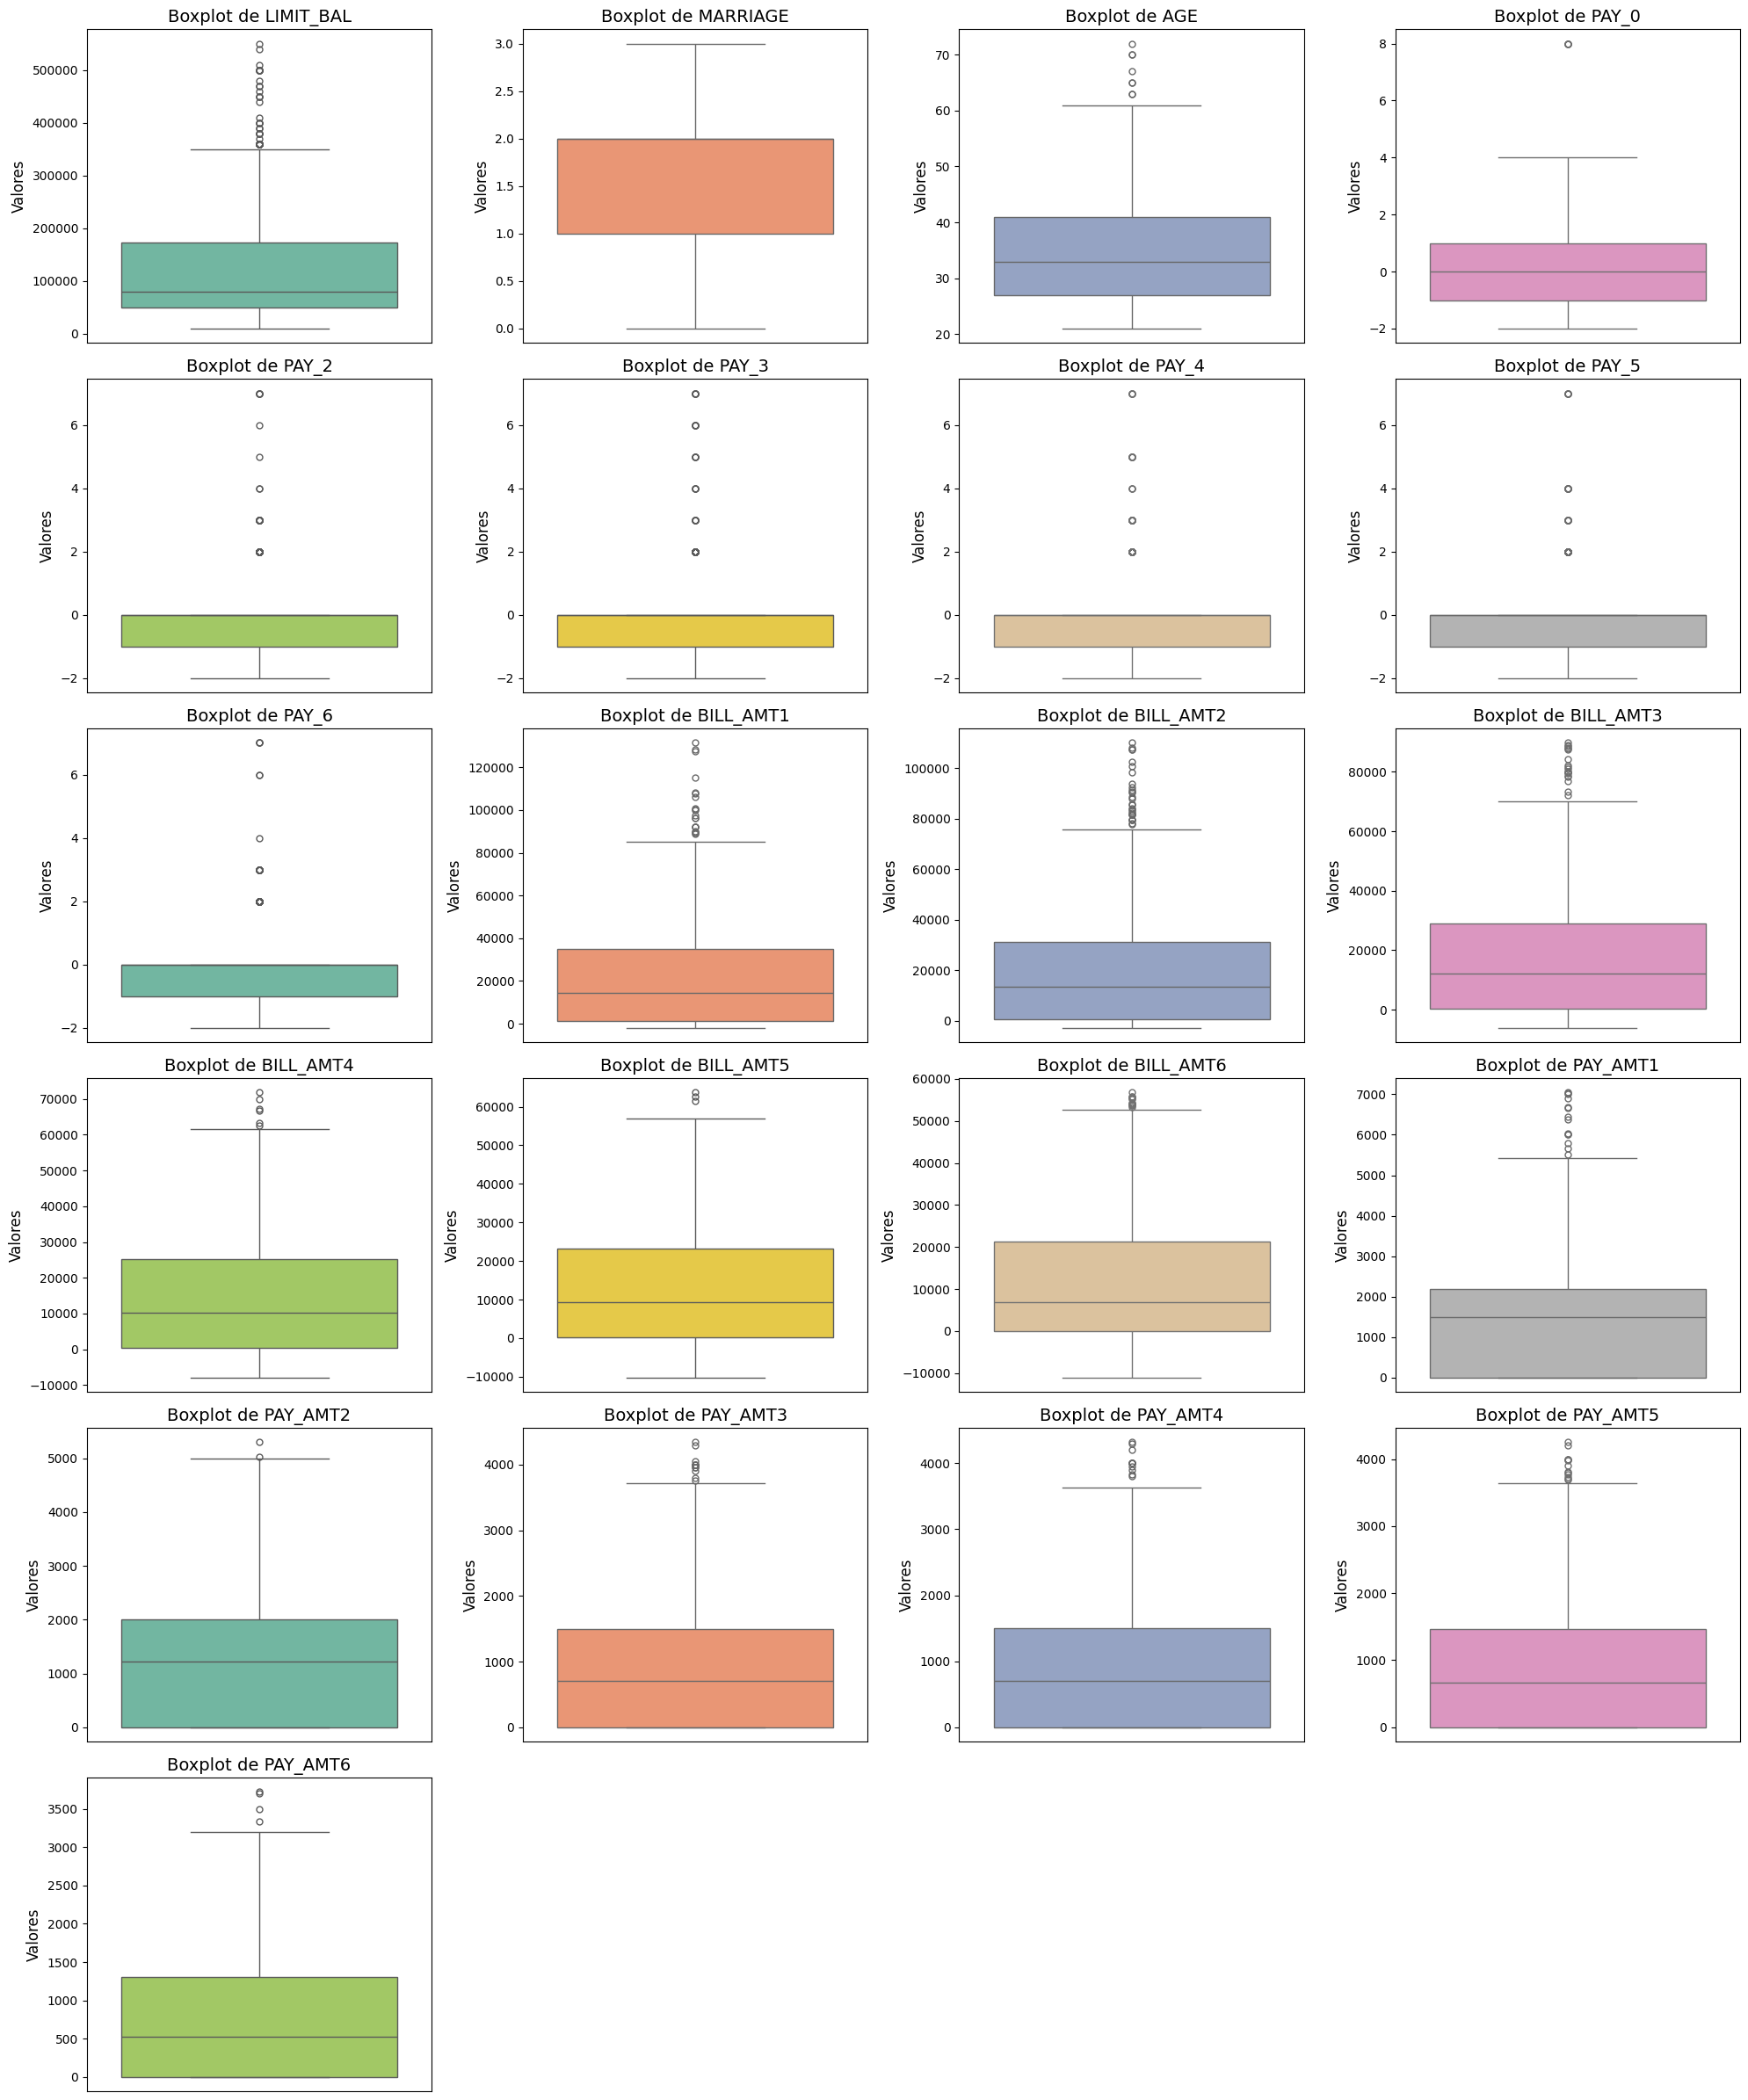

In [11]:
#Filtrar las columnas numericas
df_numerico = dfCredito.select_dtypes(include='number')
 
#Configurar tamano de los graficos
num_vars = len(df_numerico.columns)
cols = 4
rows = (num_vars // cols) + (num_vars % cols > 0)
 
plt.figure(figsize=(20, rows * 4))
 
#Usar una paleta de colores
paleta = sns.color_palette("Set2", num_vars)
 
#Crear un histograma por cada variable
for i, columna in enumerate(df_numerico.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df_numerico[columna], color=paleta[i-1], fliersize=5)
    plt.title(f'Boxplot de {columna}', fontsize=14)
    plt.ylabel('Valores', fontsize=12)
    plt.xticks([])
 
#Ajusto espacio y muestro grafico
plt.tight_layout()
plt.show()

In [12]:
dfCredito.shape

(1124, 24)

<h2> PCA <h2/>

In [13]:
dfCredito.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month (Y)'],
      dtype='object')

In [14]:
dfCredito = dfCredito.rename(columns={'default payment next month (Y)' : 'Y'})

In [15]:
dfCredito.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default


In [16]:
features = ['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']  

x = dfCredito.loc[:, features].values  
y = dfCredito.loc[:, ['Y']].values  

x = StandardScaler().fit_transform(x)  
print(x) 

[[ 0.02448898  0.70717761 -0.94147892 ...  0.12502783 -0.93019995
   1.44453389]
 [-0.63763912 -1.18086902  0.20052494 ...  0.23421141  0.20546496
   0.2693247 ]
 [-0.63763912  0.70717761  0.20052494 ...  0.12502783  0.13216198
   0.03428286]
 ...
 [-0.9214083   0.70717761  1.44634734 ...  0.2888032  -0.93019995
  -0.9058845 ]
 [ 0.11907871  0.70717761 -1.14911599 ...  0.12611967  0.06735791
   0.28460242]
 [-0.07010075 -1.18086902 -0.83766039 ...  0.88712923  1.0999737
   1.21889373]]


In [17]:
pca =PCA(n_components=2)
principalComponents = pca.fit_transform(x)
dfPCA = pd.DataFrame(data = principalComponents,
                     columns = ['PCA01','PCA02'])
dfPCA.head(5)

,PCA01,PCA02
0,-0.661665,1.755841
1,2.597365,-1.119301
2,2.376930,-0.951264
3,-1.852188,0.480618
4,-0.169569,0.907757


In [18]:
dfFinal = pd.concat( [dfPCA, dfCredito[['Y']]], axis = 1)
dfFinal.head(5)

,PCA01,PCA02,Y
0,-0.661665,1.755841,NaN
1,2.597365,-1.119301,default
2,2.376930,-0.951264,NaN
3,-1.852188,0.480618,not default
4,-0.169569,0.907757,NaN


In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
 
ax.set_xlabel('Componente Principal 1', fontsize = 10)
ax.set_ylabel('Componente Principal 2', fontsize = 10)
ax.set_title('Reducción PCA (2 Componentes Principales)', fontsize = 14)
 
targets = ['default', 'not default']
colors = ['#686466','#96d7eb']
 
for target, color in zip(targets,colors):
    indicesToKeep = dfFinal['Y'] == target
    ax.scatter(dfFinal.loc[indicesToKeep, 'PCA01']
               , dfFinal.loc[indicesToKeep, 'PCA02']
               , c = color
               , s = 50
               , alpha=0.3
               , edgecolors='none')
ax.legend(targets)
ax.grid()


In [20]:
pca.explained_variance_ratio_

array([0.40405878, 0.15206194])

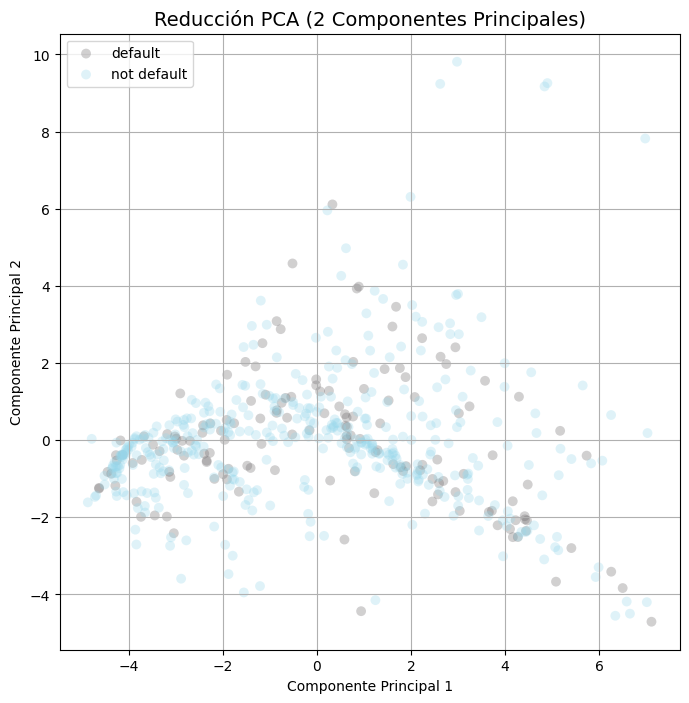

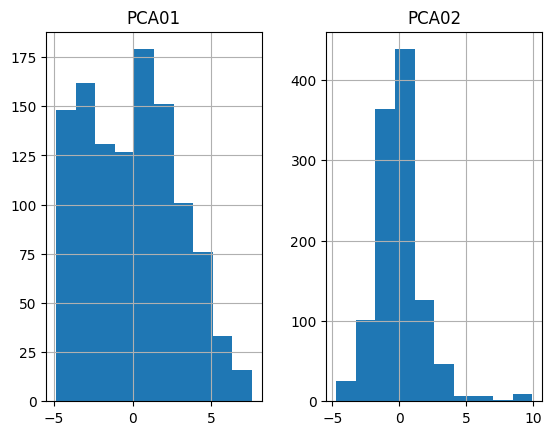

In [28]:
viz = dfFinal[['PCA01','PCA02','Y']]
viz.hist()
plt.show()

In [29]:
plt.scatter(dfFinal.PCA01, dfFinal.Y, color="blue")  
plt.xlabel("PCA01")  
plt.ylabel("Y")  
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float